In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
df=pd.read_excel('E:\\Data_Train.xlsx')
df=df.drop('New_Price',1)
test=pd.read_excel('E:Data_Test.xlsx')
test=test.drop('New_Price',1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
df.shape

(6019, 12)

In [8]:
df['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [9]:
#df['Name']=df['Name'].str.split().str[0:2]

In [10]:
df['Mileage'].mode()

0    17.0 kmpl
1    18.9 kmpl
dtype: object

In [11]:
df['Engine']=df['Engine'].fillna('1197.0')
test['Engine']=test['Engine'].fillna('1197.0')

In [12]:
df['Power']=df['Power'].fillna('74')
test['Power']=test['Power'].fillna('74')

In [13]:
df['Mileage']=df['Mileage'].fillna('18.9')

In [14]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
Price                 0
dtype: int64

In [15]:
df['Seats']=df['Seats'].fillna(5)
test['Seats']=test['Seats'].fillna(5)

In [16]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [17]:
df=df[df['Kilometers_Driven']<150000]
df=df[df['Price']<110]

In [18]:
from sklearn.preprocessing import scale
#df['Kilometers_Driven']=scale(df['Kilometers_Driven'])

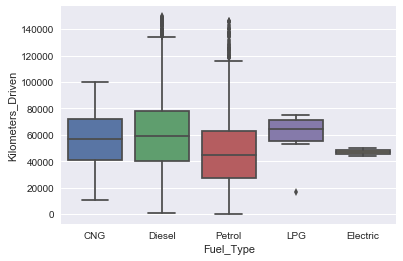

In [19]:
#df['Kilometers_Driven']=np.log(df['Kilometers_Driven'])
sns.boxplot(x=df['Fuel_Type'],y=df['Kilometers_Driven'])

In [20]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english',max_df=0.9)
tf.fit(df['Location'])
df_tf=pd.DataFrame(tf.transform(df['Location']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf1_')
df=df.join(df_tf)
df=df.drop('Location',1)

In [22]:
tf.get_feature_names()

[u'ahmedabad',
 u'bangalore',
 u'chennai',
 u'coimbatore',
 u'delhi',
 u'hyderabad',
 u'jaipur',
 u'kochi',
 u'kolkata',
 u'mumbai',
 u'pune']

In [23]:
tf=TfidfVectorizer(stop_words='english',max_df=0.9)
tf.fit(test['Location'])
test_tf=pd.DataFrame(tf.transform(test['Name']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf1_')
test=test.join(test_tf)
test=test.drop('Location',1)

In [24]:
tf.get_feature_names()

[u'ahmedabad',
 u'bangalore',
 u'chennai',
 u'coimbatore',
 u'delhi',
 u'hyderabad',
 u'jaipur',
 u'kochi',
 u'kolkata',
 u'mumbai',
 u'pune']

In [25]:
test['Fuel_Type'].value_counts()

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64

In [26]:
df['Fuel_Type'].value_counts()
df['Fuel_Type']=df['Fuel_Type'].str.replace('Electric','LPG')

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Fuel_Type'])
df['Fuel_Type']=le.transform(df['Fuel_Type'])
test['Fuel_Type']=le.transform(test['Fuel_Type'])
#df_type=pd.get_dummies(df['Fuel_Type'])
#df=df.join(df_type)
#test_type=pd.get_dummies(test['Fuel_Type'])
#test=test.join(test_type)
#df=df.drop('Fuel_Type',1)
#test=test.drop('Fuel_Type',1)

In [28]:
le.fit(df['Transmission'])
df['Transmission']=le.transform(df['Transmission'])
test['Transmission']=le.transform(test['Transmission'])

In [29]:
df['Owner_Type']=df['Owner_Type'].str.replace('Fourth & Above','Third')
test['Owner_Type']=test['Owner_Type'].str.replace('Fourth & Above','Third')

In [30]:
le.fit(df['Owner_Type'])
df['Owner_Type']=le.transform(df['Owner_Type'])
test['Owner_Type']=le.transform(test['Owner_Type'])

In [31]:
df['Mileage']=df['Mileage'].str.split().str[0]
test['Mileage']=test['Mileage'].str.split().str[0]

In [32]:
df['Engine']=df['Engine'].str.split().str[0]
test['Engine']=test['Engine'].str.split().str[0]

In [33]:
df['Power']=df['Power'].str.split().str[0]
test['Power']=test['Power'].str.split().str[0]

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
df['Name']=df['Name'].str.replace('[^a-zA-Z]',' ')
test['Name']=test['Name'].str.replace('[^a-zA-Z]',' ')

In [36]:
tf=TfidfVectorizer(stop_words='english',ngram_range=(2,2),max_df=0.9,max_features=50)
df['Name']=tf.fit_transform(df['Name']).toarray()
#df_tf=pd.DataFrame(tf.transform(df['Name']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
#df=df.join(df_tf)
#df=df.drop('Name',1)

In [37]:
tf=TfidfVectorizer(stop_words='english',ngram_range=(2,2),max_df=0.9,max_features=50)
test['Name']=tf.fit_transform(test['Name']).toarray()
#test_tf=pd.DataFrame(tf.transform(test['Name']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
#test=test.join(test_tf)
#test=test.drop('Name',1)

In [38]:
df.shape

(5890, 22)

In [39]:
test.shape

(1234, 21)

In [40]:
df=df.fillna(0)

In [41]:
df['Power']=df['Power'].str.replace('null','74')
test['Power']=test['Power'].str.replace('null','74')

In [42]:
df['Mileage']=df['Mileage'].astype('float')
df['Engine']=df['Engine'].astype('float')
df['Power']=df['Power'].astype('float')
test['Mileage']=test['Mileage'].astype('float')
test['Engine']=test['Engine'].astype('float')
test['Power']=test['Power'].astype('float')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale

In [44]:
x=df.drop('Price',1)
y=df['Price']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [46]:
from xgboost import XGBRegressor
clf= XGBRegressor(n_estimators=350,max_depth=4,subsample=0.8,min_child_weight=0.7)
clf.fit(x,y)
clf.score(x,y)
#y_clf=clf.predict(x_test)
#np.sqrt(mean_squared_error(y_clf,y_test))

C:\Users\user\Anaconda2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda2\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.9802876185206186

In [47]:
lasso=DecisionTreeRegressor(max_depth=6)
lasso.fit(x_train,y_train)
y_lasso=lasso.predict(x_test)
np.sqrt(mean_squared_error(y_lasso,y_test))

4.525832665019746

In [48]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(n_estimators=450)
bag.fit(x,y)
bag.score(x,y)
#y_bag=bag.predict(x_test)
#np.sqrt(mean_squared_error(y_bag,y_test))

0.9858487545419441

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=250,max_depth=7,subsample=0.6)
gb.fit(x_train,y_train)
y_gb=gb.predict(x_test)
np.sqrt(mean_squared_error(y_gb,y_test))

3.140670237062719

In [50]:
y_test=bag.predict(test)

In [51]:
sub=pd.DataFrame(y_test)
sub.columns=['Price']

In [52]:
sub.to_excel('F:\\answer.xlsx',index=False)

In [53]:
sub

,Price
0,3.315200
1,2.265133
2,17.675844
3,3.744467
4,4.596289
5,12.170800
6,21.404933
7,3.075689
8,4.337178
9,10.103156
